<a href="https://colab.research.google.com/github/Cris0402/Maria-Cristina-Betancur-Ramos/blob/main/2da_preentrega_grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio - Encuesta de hogares 2019

# Objetivo

## Librerías

In [1]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Data set

In [2]:
# Leo los datos en un DataFrame
datos = pd.read_csv("encuesta-anual-hogares-2019.csv", delimiter=',')

In [3]:
# Inspecciono las 5 primeras filas
datos.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


### Dimensiones data set

In [4]:
# Uso .shape para obtener cantidad de filas y columnas
datos.shape

(14319, 31)

## Variables

### Nombre de las variables

In [5]:
# Obtengo el nombre de las columnas
datos.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

### Descripción de variables

1. **id:** Clave que identifica a la vivienda  
2. **nhogar:** La variable id + nhogar componen la clave que identifica a cada hogar  
3. **miembro:** Variables id + nhogar+ miembro componen la clave que identifica a cada persona  
4. **comuna:** Comuna donde reside la persona encuestada  
5. **dominio:** Variable categórica que indica si la vivienda se ubica en una villa de emergencia
6. **edad:**	Edad de la persona encuestada
7. **sexo:**	Sexo de la persona encuestada
8. **parentesco_jefe:** Variable categórica que indica la relación de parentesco entre la persona encuestada y el jefe/a de hogar  
9. **situacion_conyugal:** Situación conyugal de la persona encuestada  
10. **num_miembro_padre:**	Número de miembro que corresponde al padre
11. **num_miembro_madre:**	Número de miembro que corresponde a la madre
12. **estado_ocupacional:** Situación ocupacional de la persona encuestada
13. **cat_ocupacional:** Categoría ocupacional de la persona encuestada
14. **calidad_ingresos_lab:** Calidad de la declaración de ingresos laborales totales
15. **ingreso_total_lab:**	Monto del ingreso total laboral percibido el mes anterior
16. **calidad_ingresos_no_lab:** Calidad de la declaración de ingresos no laborales totales
17. **ingreso_total_no_lab:**	Monto del ingreso total no laboral percibido el mes anterior
18. **calidad_ingresos_totales:**	Calidad de ingresos totales individuales
19. **ingresos_totales:** Monto del ingreso total individual percibido el mes anterior
20. **calidad_ingresos_familiares:**	Calidad de ingresos totales familiares
21. **ingresos_familiares:** Monto de ingresos totales familiares percibido el mes anterior
22. **ingreso_per_capita_familiar:** Monto de ingresos totales familiares percibido el mes anterior
23. **estado_educativo:** Asistencia (pasada o presente) o no a algún establecimiento educativo
24. **sector_educativo:** Sector al que pertenece el establecimiento educativo al que asiste
25. **nivel_actual:** Nivel cursado al momento de la encuesta
26. **nivel_max_educativo:** Máximo nivel educativo que se cursó
27. **años_escolaridad:** Años de escolaridad alcanzados
28. **lugar_nacimiento:** Lugar de nacimiento de la persona encuestada
29. **afiliacion_salud:** Afiliación de salud de la persona encuestada
30. **hijos_nacidos_vivos:** Tiene o tuvo hijos nacidos vivos
31. **cantidad_hijos_nac_vivos:** Cantidad de hijos nacidos vivos

### Tipo de datos de cada columna

In [ ]:
# Obtengo el tipo de datos de las columnas del dataframe
datos.dtypes

id                              int64
nhogar                          int64
miembro                         int64
comuna                          int64
dominio                        object
edad                            int64
sexo                           object
parentesco_jefe                object
situacion_conyugal             object
num_miembro_padre              object
num_miembro_madre              object
estado_ocupacional             object
cat_ocupacional                object
calidad_ingresos_lab           object
ingreso_total_lab               int64
calidad_ingresos_no_lab        object
ingreso_total_no_lab            int64
calidad_ingresos_totales       object
ingresos_totales                int64
calidad_ingresos_familiares    object
ingresos_familiares             int64
ingreso_per_capita_familiar     int64
estado_educativo               object
sector_educativo               object
nivel_actual                   object
nivel_max_educativo            object
años_escolar

In [ ]:
# Renombro columnas del DataFrame
datos.rename(columns={"situacion_conyugal": "est_civil", }, inplace=True)


In [11]:
# Chequeo que se hayan reemplazado correctamente
datos.columns


Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'est_civil', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [12]:
# Obtengo los valores unicos de la columna estado_ocupacional
ocupacion=datos["estado_ocupacional"].unique()
#Imprimo los resuldatos
print("Las categorias en la columna estado_ocupacional son:",ocupacion )

Las categorias en la columna estado_ocupacional son: ['Inactivo' 'Ocupado' 'Desocupado']


In [49]:
# Cuento encuestados por comuna
print("Los encuestados por comuna son:", datos.groupby("comuna").miembro.count())

Los encuestados por comuna son: comuna
1     1265
2      765
3      906
4     1300
5      818
6      755
7     1116
8     1640
9      967
10     765
11     728
12     801
13     833
14     847
15     813
Name: miembro, dtype: int64


## Análisis exploratorio

El data frame contiene variables de ingresos laborales en pesos argentinos para el año 2019. Consideramos pertinente crear nuevas variables con los valores de ingresos en dólares estadounidenses a fin de poder extrapolar los datos a la actualidad y comparar con valores en otros países.
Utilizamos el valor alcanzado por el dólar al 30 de diciembre de 2019 que fue de $63.35      

**Las variables a crear serían:**

- ingreso_total_lab_USD (creada a partir de ingreso_total_lab)     
- ingreso_total_no_lab_USD (creada a partir de ingreso_total_no_lab)  
- ingresos_totales_USD (creada a partir de ingresos_totales)                 
- ingresos_familiares_USD  (creada a partir de ingresos_familiares)          
- ingreso_per_capita_familiar_USD (creada a partir de ingreso_per_capita_familiar)     


In [ ]:
datos['ingreso_total_lab_USD'] = datos['ingreso_total_lab']/63.35
datos['ingreso_total_no_lab_USD'] = datos['ingreso_total_no_lab']/[63.35]
datos['ingresos_totales_USD'] = datos['ingresos_totales']/63.35
datos['ingresos_familiares_USD'] = datos['ingresos_familiares']/63.35
datos['ingreso_per_capita_familiar_USD'] = datos['ingreso_per_capita_familiar']/63.35

### Descripción estadístia general de las variables

In [6]:
# Obtento información estadística de los datos del dataframe
datos.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar
count,14319.000000,14319.000000,14319.000000,14319.000000,14319.00000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,2710.024094,1.009638,2.144982,7.620644,38.81549,20078.626440,6016.234583,26094.861024,70212.818423,26192.009638
std,1535.910251,0.126376,1.354969,4.236359,23.11017,34698.173111,16065.350052,37152.503186,62685.684278,27463.908496
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1473.000000,1.000000,1.000000,4.000000,20.00000,0.000000,0.000000,0.000000,30000.000000,10500.000000
50%,2611.000000,1.000000,2.000000,8.000000,37.00000,2500.000000,0.000000,16000.000000,54000.000000,19900.000000
75%,3898.000000,1.000000,3.000000,11.000000,57.00000,30000.000000,4000.000000,37000.000000,90000.000000,33500.000000
max,5795.000000,7.000000,19.000000,15.000000,100.00000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000


Del resumen estadístico podemos destacar:
*  **id:** el valor máximo nos da la cantidad de hogares muestreados: 5795
*  **miembro:** el número mínimo registrado de personas por hogar es 1 y el máximo es 19
*  **comuna:** el valor máximo nos informa que el muestreo tuvo en cuenta a las 15 comunas que conforman la Ciudad de Buenos Aires
*  **edad:** la edad promedio de las personas encuestadas fue de aproximadamente 39 años. La edad mínima fue de 0 años y la máxima de 100 años. Los valores de la media y la mediana nos informan que la muestra tuvo una mayor proporción de personas jóvenes (ver histograma) que determinó que los datos estuvieran concentrados hacia la izquierda
*  **ingresos_totales:** el valor máximo en pesos fue 1000000 y la media fue 26094.86 a valores del 2019
* **ingresos_familiares:** el valor medio en pesos fue 70212.82 por hogar a valores del 2019

### Cantidad de valores nulos

In [50]:
# Obtengo la cantidad de datos faltantes en cada columna
datos.isnull().sum()

id                                0
nhogar                            0
miembro                           0
comuna                            0
dominio                           0
edad                              0
sexo                              0
parentesco_jefe                   0
est_civil                         1
num_miembro_padre                 0
num_miembro_madre                 0
estado_ocupacional                0
cat_ocupacional                   0
calidad_ingresos_lab              0
ingreso_total_lab                 0
calidad_ingresos_no_lab           0
ingreso_total_no_lab              0
calidad_ingresos_totales          0
ingresos_totales                  0
calidad_ingresos_familiares       0
ingresos_familiares               0
ingreso_per_capita_familiar       0
estado_educativo                  0
sector_educativo                  3
nivel_actual                      0
nivel_max_educativo            1054
años_escolaridad                 62
lugar_nacimiento            

### Exploración de valores nulos presentes


La variable **hijos_nacido_vivos** contiene la mayor cantidad de valores nulos del data frame, 54% de los registros de la variable son nulos (7784/len(datos)). La información contenida en esta variable es similar a la de la variable **cantidad_hijos_nac_vivos**. Se podría considerar esta última, que no posee nulos, en los análisis si es necesario.  

En la variable **nivel_max_educativo** los valores nulos estan concentrados en los primeros años de edad. Desde los 0 a los 5 años el número de personas registradas coincide con el número de nulos para cada una de esas edades. Se podría considerar ubicar a estos datos dentro de una nueva categoría que describa correctamente su situacion por ej: "No alcanzado" o utilizar una categoría ya existente como "No corresponde"

In [ ]:
# Valores nulos de la variable nivel_max_educativo por edad
count_nulls = datos.groupby('edad')['nivel_max_educativo'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por edad
nulls = count_nulls.to_frame() #Convertir serie en data frame
nulls = nulls.reset_index()
nulls = nulls.rename(columns={'nivel_max_educativo': 'nulls_nivel_max_educativo'})
print(nulls.head(10))

   edad  nulls_nivel_max_educativo
0     0                        128
1     1                        148
2     2                        158
3     3                        160
4     4                        177
5     5                        182
6     6                         53
7     7                          1
8     8                          0
9     9                          0


In [ ]:
# Número de personas registradas de entre 0 y 8 años.
# Hasta los 5 años los valores nulos coindicen con el numero de personas registradas en ese rango de edades
edades =[0,1,2,3,4,5,6,7,8]
for i in edades:
    numero = (datos['edad'] == i).sum()
    print(i, numero)

0 128
1 148
2 158
3 160
4 177
5 182
6 152
7 176
8 176


Text(0.5, 0, 'Edad')

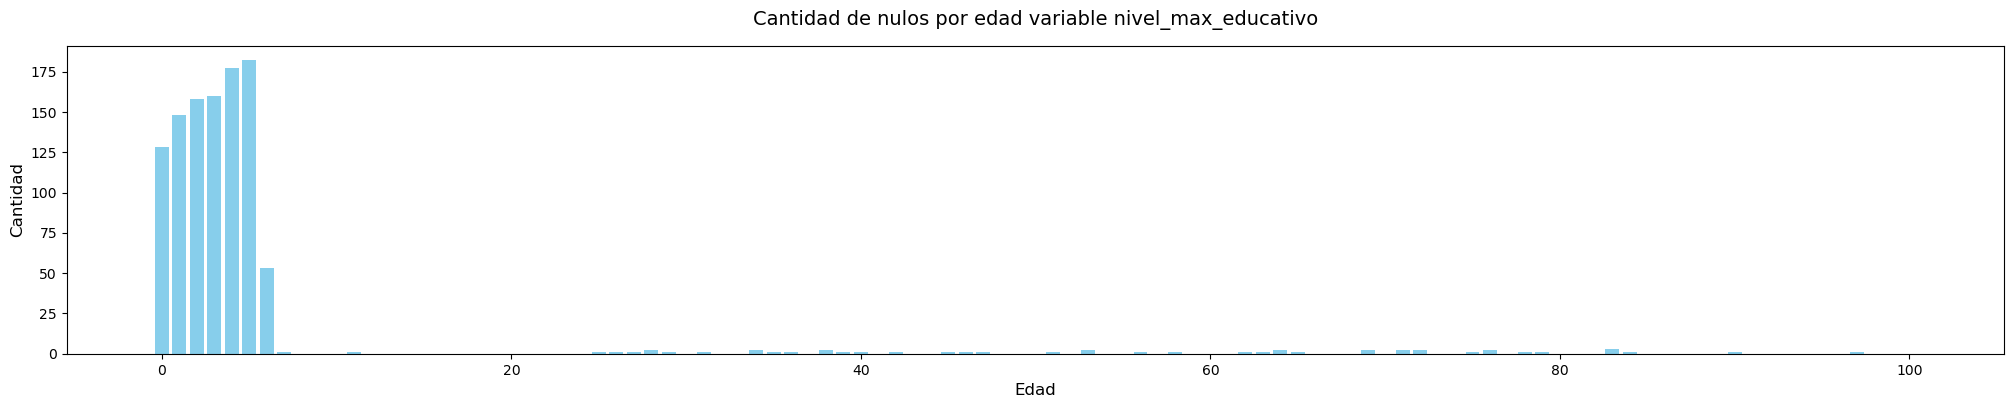

In [ ]:
plt.figure(figsize=(25, 4))
plt.bar("edad", "nulls_nivel_max_educativo", data=nulls, color="skyblue")
plt.title('Cantidad de nulos por edad variable nivel_max_educativo', size=14, pad=15)
plt.ylabel('Cantidad', size=12)
plt.xlabel('Edad', size=12)

In [ ]:
### Crear variable con ingresos en dólares (ver valor para el año 2019)

Text(0, 0.5, 'Cantidad')

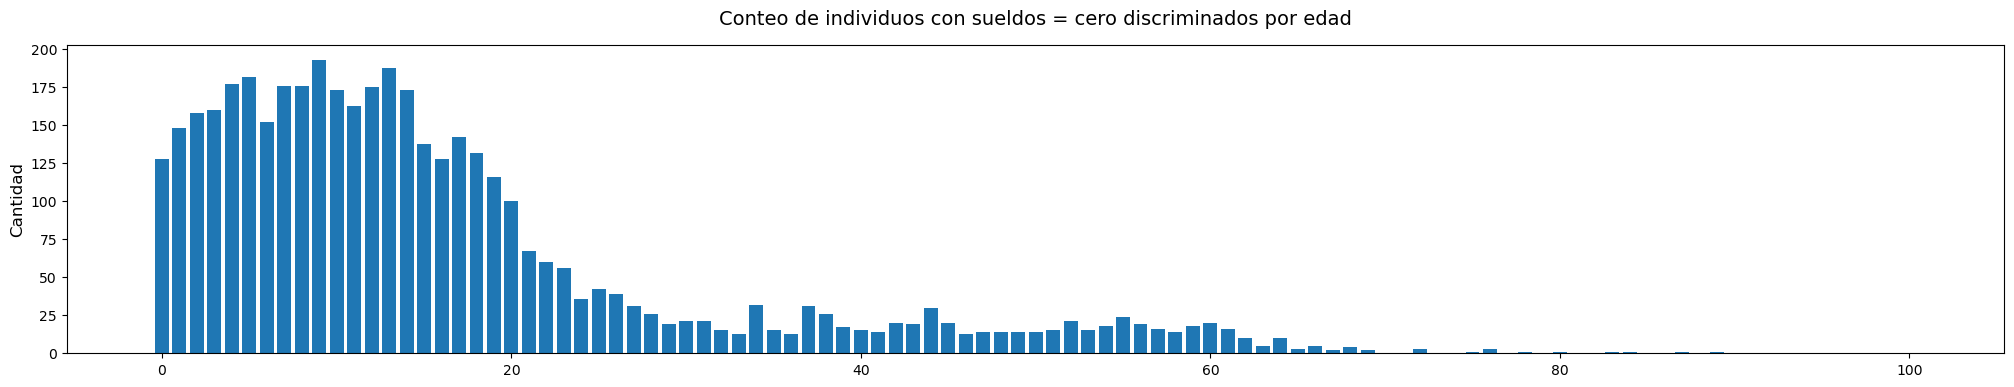

In [ ]:
conteo_ceros_por_edad = datos.groupby('edad')['ingresos_totales'].apply(lambda x: (x == 0).sum())

ceros = conteo_ceros_por_edad.to_frame() #Convertir serie en data frame
ceros = ceros.reset_index()

plt.figure(figsize=(25, 4))
plt.bar("edad", "ingresos_totales", data=ceros)
plt.title('Conteo de individuos con sueldos = cero discriminados por edad', size=14, pad=15)
plt.ylabel('Cantidad', size=12)